## Energy loss and momentum broadening in cold QCD matter

## Import and Preprocess

In [2]:
# run this once per notebook
import sys
from pathlib import Path
import numpy as np

project = Path.cwd()                  
sys.path.insert(0, str(project / "code"))

In [3]:
from eloss_module import load_eloss_run, plot_rpa_vs_centrality, plot_rpa_vs_y_grid, plot_rpa_vs_pt_grid


## $R_{pA}$ vs Centrality

In [5]:

# Choose y and pT ranges; they will be clamped to the available grid extents
y_range = (-5.0, 5.0)
pt_range = (0.1, 20.0)

df_cent = run.rpa_vs_centrality(y_range=y_range, pt_range=pt_range)
df_cent

,cent_tag,cent_mid,xerr,cent_left,cent_right,RpA,dRpA
0,0-20,10.0,10.0,0.0,20.0,0.857518,0.007881
1,20-40,30.0,10.0,20.0,40.0,0.813866,0.006375
2,40-60,50.0,10.0,40.0,60.0,0.803342,0.005198
3,60-100,80.0,20.0,60.0,100.0,0.851097,0.004031


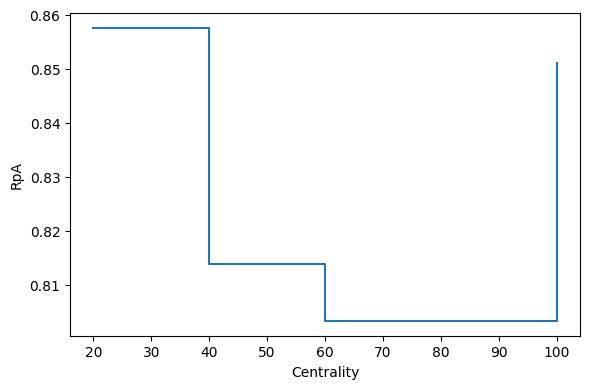

In [6]:
plt.figure(figsize=(6,4))
plt.step(df_cent["cent_right"], df_cent["RpA"], where="post")
plt.xlabel("Centrality")
plt.ylabel("RpA")
plt.tight_layout()
plt.show()

In [7]:
# Save
out_csv = os.path.join(BASE, "rpa_vs_centrality.csv")
df_cent.to_csv(out_csv, index=False)
print("Saved:", out_csv)

Saved: /home/sawin/Desktop/Charmonia/quenching_integration/output/JPsi/5TeV/rpa_vs_centrality.csv


## $R_{pA}$ vs Rapidity

In [8]:
# Pick a centrality that exists in your files (e.g., '40-60' or '20-40')
cent_tag = sorted(run.cent_bins.keys())[0]
y_edges = np.linspace(-5, 5, 21)  # 0.5-wide bins
pt_range = (0.1, 20.0)

df_y = run.rpa_vs_y(cent_tag, y_edges=y_edges, pt_range=pt_range)
df_y

,y_left,y_right,y_mid,RpA
0,-5.0,-4.5,-4.75,1.286826
1,-4.5,-4.0,-4.25,1.037962
2,-4.0,-3.5,-3.75,0.932338
3,-3.5,-3.0,-3.25,0.876287
4,-3.0,-2.5,-2.75,0.840541
5,-2.5,-2.0,-2.25,0.815457
6,-2.0,-1.5,-1.75,0.797605
7,-1.5,-1.0,-1.25,0.783916
8,-1.0,-0.5,-0.75,0.772549
9,-0.5,0.0,-0.25,0.762733


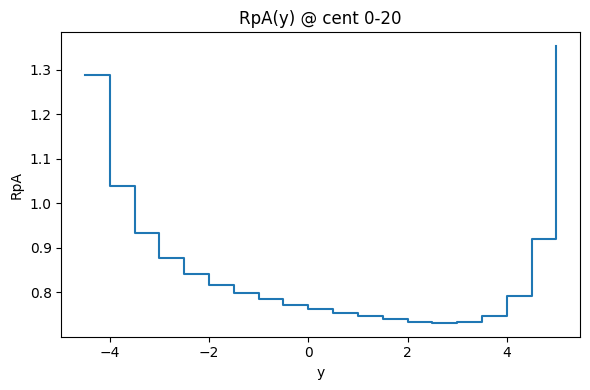

In [24]:
# Plot (single figure, as requested)
plt.figure(figsize=(6,4))
plt.step(df_y["y_right"], df_y["RpA"], where="post")
plt.xlabel("y")
plt.ylabel("RpA")
plt.title(f"RpA(y) @ cent {cent_tag}")
plt.tight_layout()
plt.show()

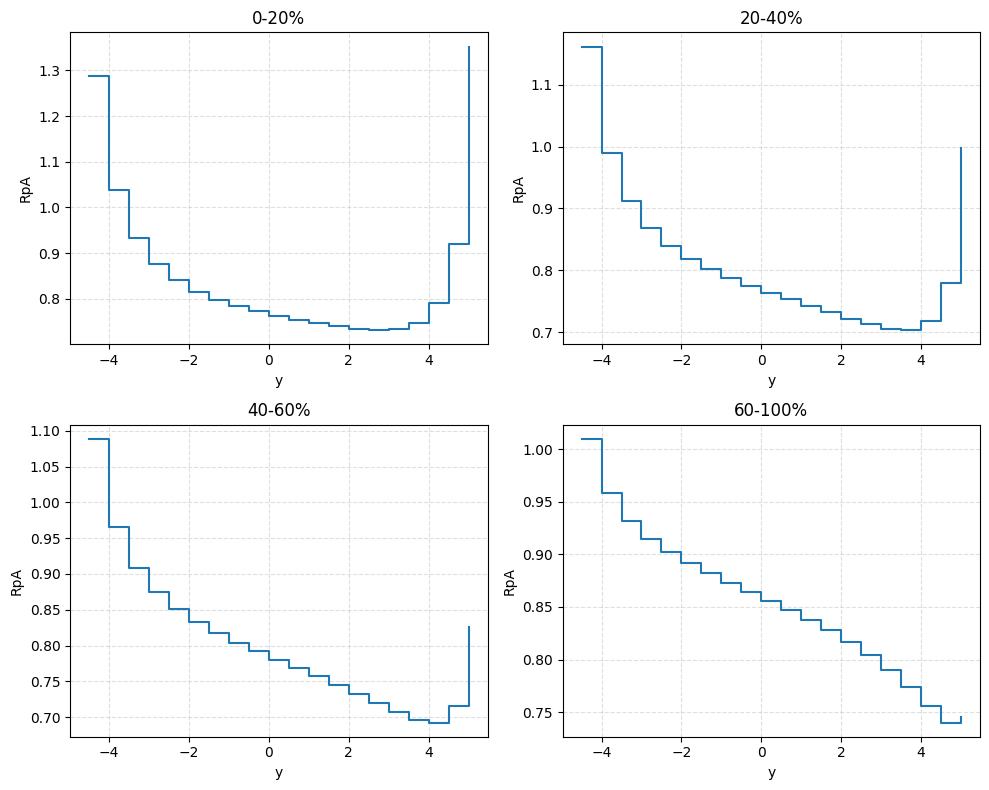

In [ ]:
# 2) RpA vs y (pT-averaged) subplots across centralities
import numpy as np
y_edges = np.linspace(-5, 5, 21)
figY, _ = plot_rpa_vs_y_grid(run, y_edges=y_edges, pt_range=(0.1,20.0), ncols=2, figsize=(10,8))
# figY.savefig("RpA_vs_y_grid_5TeV.png", dpi=200)

## $R_{pA}$ vs Transverse Momentum

In [10]:
# Example: forward rapidity (1.5 < y < 4.0); change as needed
y_range = (1.5, 4.0)
pt_edges = np.arange(0.0, 20.0+2.5, 2.5)

df_pt = run.rpa_vs_pt(cent_tag, y_range=y_range, pt_edges=pt_edges)
df_pt

,pt_left,pt_right,pt_mid,RpA
0,0.0,2.5,1.25,0.218937
1,2.5,5.0,3.75,0.828365
2,5.0,7.5,6.25,1.263840
3,7.5,10.0,8.75,1.195933
4,10.0,12.5,11.25,1.084643
5,12.5,15.0,13.75,1.012669
6,15.0,17.5,16.25,0.968756
7,17.5,20.0,18.75,0.941069


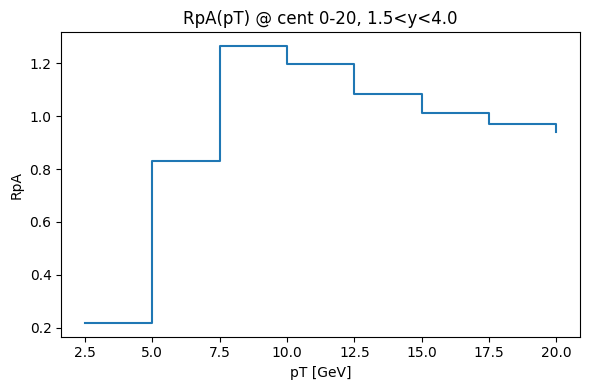

In [ ]:
plt.figure(figsize=(6,4))
plt.step(df_pt["pt_right"], df_pt["RpA"], where="post")
plt.xlabel("pT [GeV]")
plt.ylabel("RpA")
plt.title(f"RpA(pT) @ cent {cent_tag}, {y_range[0]}<y<{y_range[1]}")
plt.tight_layout()
plt.show()

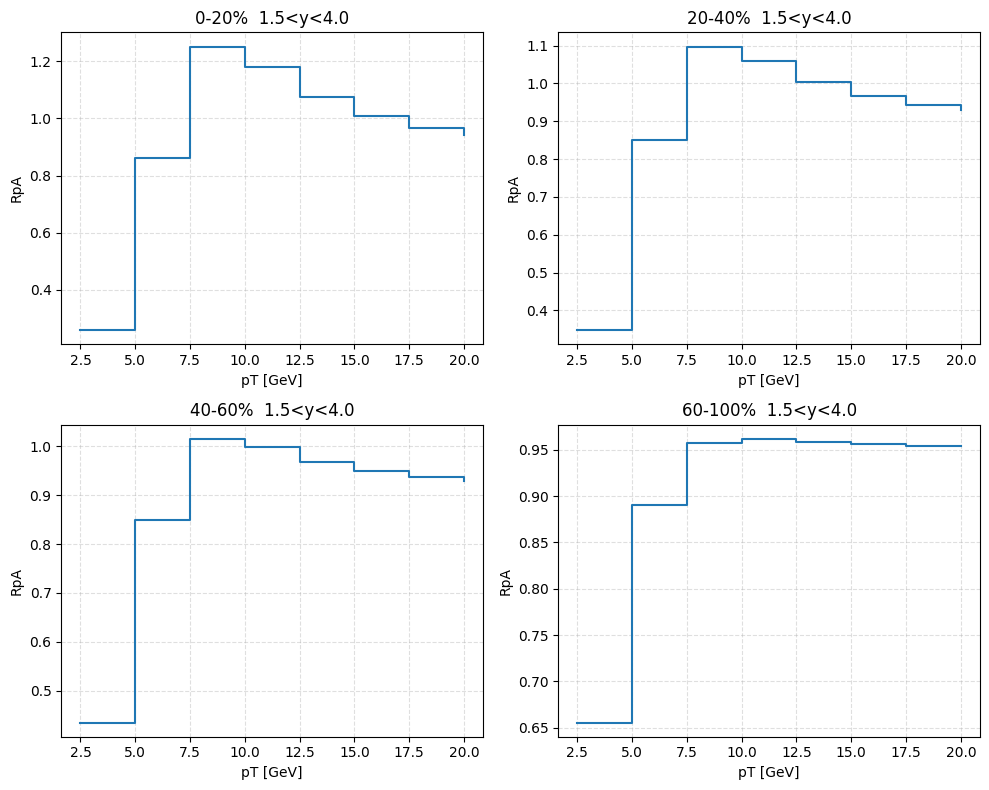

In [27]:
# 3) RpA vs pT (y-averaged) subplots across centralities
pt_edges = np.arange(0.0, 20.0+2.5, 2.5)

# forward / mid / backward windows you used
figPT_fwd, _ = plot_rpa_vs_pt_grid(run, y_range=(1.5,4.0),   pt_edges=pt_edges, ncols=2, figsize=(10,8))

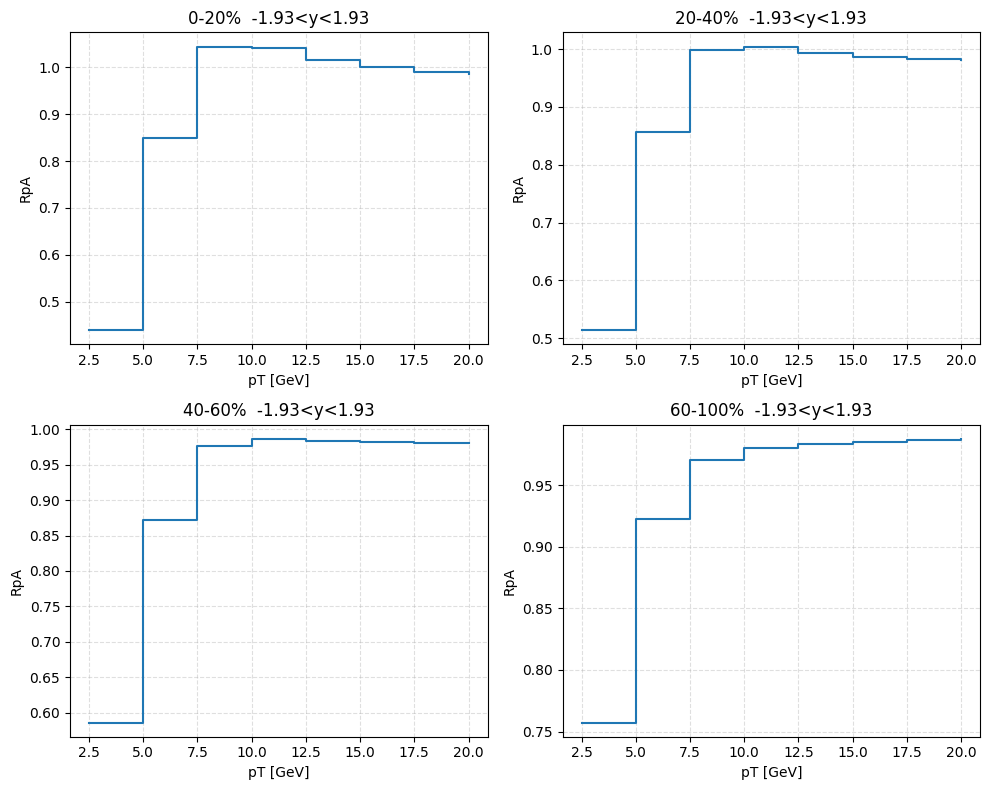

In [28]:
figPT_mid, _ = plot_rpa_vs_pt_grid(run, y_range=(-1.93,1.93), pt_edges=pt_edges, ncols=2, figsize=(10,8))

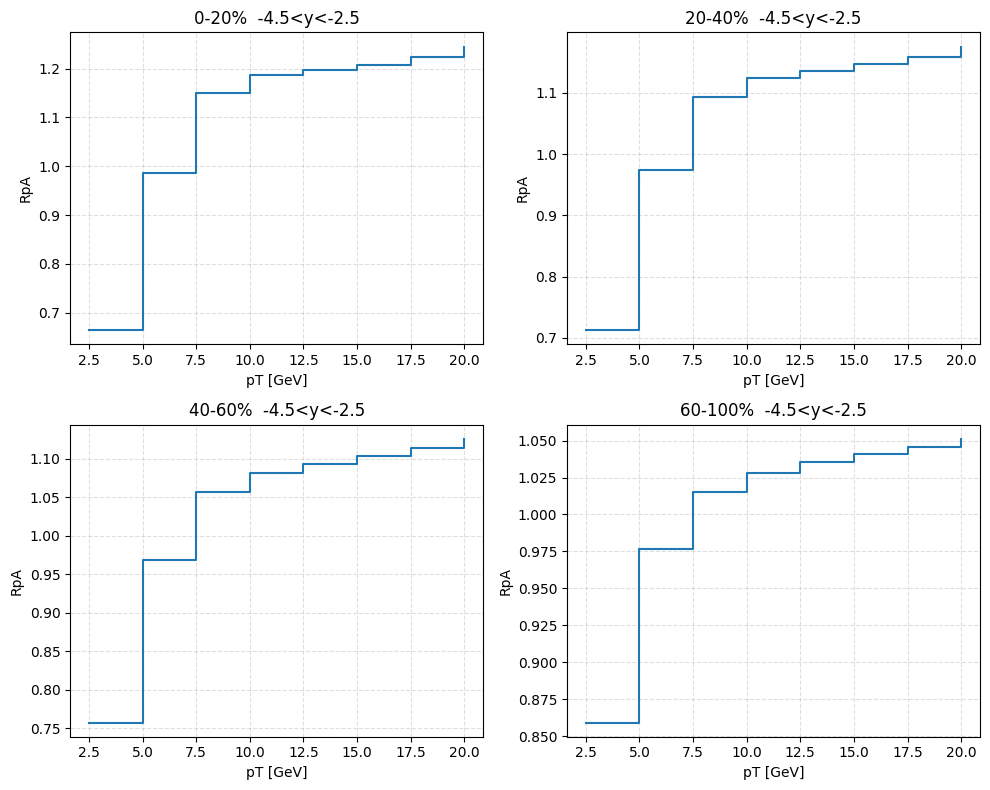

In [29]:
figPT_bwd, _ = plot_rpa_vs_pt_grid(run, y_range=(-4.5,-2.5), pt_edges=pt_edges, ncols=2, figsize=(10,8))

In [30]:
figPT_fwd.savefig("RpA_vs_pT_forward_5TeV.png", dpi=200)
figPT_mid.savefig("RpA_vs_pT_mid_5TeV.png", dpi=200)
figPT_bwd.savefig("RpA_vs_pT_backward_5TeV.png", dpi=200)